In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
spam_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
spam_data = spam_data.drop(columns=[col for col in spam_data.columns if "Unnamed" in col])
spam_data.columns = ['label', 'data']  # Rename columns
spam_data['b_labels'] = spam_data['label'].map({'ham': 1, 'spam': 0})  # Add binary labels

In [3]:
x_train, x_test, y_train, y_test = train_test_split(spam_data['data'], spam_data['b_labels'].values, test_size=0.33)


In [4]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)

In [5]:
data_train = pad_sequences(tokenizer.texts_to_sequences(x_train))
data_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=data_train.shape[1])


In [6]:
D = 20  # Embedding dimensions
M = 15  # LSTM units
T = data_train.shape[1]  # Max sequence length
V = len(tokenizer.word_index)  # Vocabulary size

In [7]:
input_layer = Input(shape=(T,))
embedding = Embedding(V + 1, D)(input_layer)
lstm = LSTM(M, return_sequences=True)(embedding)
pooling = GlobalMaxPooling1D()(lstm)
output_layer = Dense(1, activation='sigmoid')(pooling)

In [8]:
model = Model(input_layer, output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
history = model.fit(data_train, y_train, validation_data=(data_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
117/117 [==============================] - 5s 21ms/step - loss: 0.4533 - accuracy: 0.8679 - val_loss: 0.4082 - val_accuracy: 0.8564
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.3694 - accuracy: 0.8706 - val_loss: 0.3277 - val_accuracy: 0.8564
Epoch 3/10
117/117 [==============================] - 2s 17ms/step - loss: 0.2418 - accuracy: 0.8706 - val_loss: 0.2254 - val_accuracy: 0.8564
Epoch 4/10
117/117 [==============================] - 2s 17ms/step - loss: 0.1678 - accuracy: 0.9269 - val_loss: 0.1626 - val_accuracy: 0.9685
Epoch 5/10
117/117 [==============================] - 2s 17ms/step - loss: 0.1114 - accuracy: 0.9866 - val_loss: 0.1221 - val_accuracy: 0.9782
Epoch 6/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0751 - accuracy: 0.9914 - val_loss: 0.0932 - val_accuracy: 0.9842
Epoch 7/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0525 - accuracy: 0.9962 - val_loss: 0.0799 - val_accuracy: 0.9859

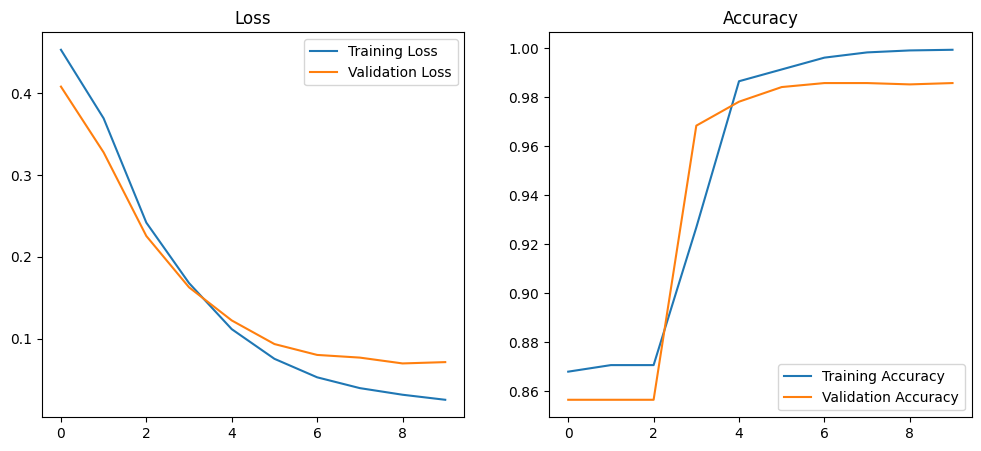

In [10]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [15]:
def predict_spam(email_text):
    email_seq = tokenizer.texts_to_sequences([email_text])  # Tokenize input text
    email_pad = pad_sequences(email_seq, maxlen=T)  # Pad sequence
    prediction = model.predict(email_pad)[0][0]  # Predict
    return "Spam" if prediction < 0.5 else "Ham"

# Example usage
email_input = input("Enter an email to check if it's spam or not: ")
print(f"This email is: {predict_spam(email_input)}")

1/1 [==============================] - 0s 18ms/step
This email is: Ham
